<a href="https://colab.research.google.com/github/billbell73/classification_project/blob/main/Initial_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import io

dataframe = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
dataframe.shape

(595212, 59)

In [ ]:
dataframe.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
dataframe.sample(100)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
190343,475758,0,2,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.7,1.2,1.778518,10,1,-1,0,0,6,1,1,0,1,27,2,0.374166,0.769354,0.390768,3.464102,0.3,0.4,0.9,2,2,6,3,11,2,6,8,0,3,11,0,1,1,0,1,0
258516,645923,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.3,0.872138,11,1,-1,0,-1,1,1,1,2,0,64,1,0.316228,0.631540,0.361939,3.162278,0.8,0.2,0.8,3,1,8,1,11,2,12,10,2,2,5,0,1,0,0,0,1
67441,168761,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.2,0.2,-1.000000,7,1,-1,0,-1,0,1,1,2,1,62,3,0.400000,0.731310,0.382623,2.236068,0.5,0.0,0.7,4,0,6,0,7,4,9,2,1,6,8,0,1,0,1,0,0
183939,459900,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.8,0.6,1.123332,11,0,-1,0,-1,10,1,0,0,1,55,2,0.424264,1.216660,0.416533,3.741657,0.7,0.4,0.7,1,1,8,3,7,3,9,2,0,3,7,0,0,1,0,0,0
26508,66419,0,2,1,4,0,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.9,0.2,0.605186,11,1,1,0,1,7,1,0,1,1,104,3,0.400000,1.078662,0.372424,3.741657,0.6,0.0,0.2,4,1,7,5,9,3,9,5,2,2,10,0,1,1,1,1,0
27295,68368,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,0,2,1,38,3,0.316228,0.778203,0.359861,3.741657,0.6,0.5,0.6,1,4,4,1,10,0,4,4,3,1,5,0,1,0,0,1,0
43972,110182,1,0,1,2,1,0,0,0,1,0,0,0,0,0,0,11,1,0,0,0.4,0.0,-1.000000,7,1,1,0,1,1,1,0,2,1,91,3,0.424264,1.021738,0.382492,3.605551,0.0,0.7,0.6,3,3,8,2,10,2,8,10,1,5,4,0,1,0,0,1,0
318118,794970,0,5,2,2,0,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.8,1.4,-1.000000,7,1,-1,0,-1,0,1,1,2,1,87,3,0.316228,0.659389,0.361525,3.000000,0.3,0.6,0.2,1,1,9,2,10,4,10,4,1,3,2,0,1,0,1,0,0
46344,116203,0,0,1,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.9,0.4,0.695971,7,1,0,0,1,0,1,1,1,1,22,3,0.316228,0.785614,0.310322,3.605551,0.7,0.9,0.7,1,2,9,4,12,2,4,8,2,6,17,0,1,1,1,0,0
150426,375981,0,1,2,5,1,0,0,0,1,0,0,0,0,0,0,4,1,0,0,0.0,0.8,1.106232,7,0,-1,0,-1,15,1,1,2,1,5,2,0.424264,0.988780,0.400000,3.162278,0.7,0.0,0.6,3,0,6,3,8,3,6,11,0,3,11,0,1,0,0,1,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataframe.to_pickle("/content/drive/MyDrive/datasets/porto_seguro.pickle")

In [ ]:
df = dataframe[(dataframe >= 0).all(1)]
df.shape

(124931, 59)

In [ ]:
df2 = dataframe.drop(columns=['ps_car_03_cat', 'ps_car_05_cat'])
df2.shape

(595212, 57)

In [ ]:
df2 = df2[(df2 >= 0).all(1)]
df2.shape

(443531, 57)

In [ ]:
X2 = df2.drop('target', 1)
y2 = df2.iloc[:, 1]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

select = SelectKBest(score_func=chi2, k=15)
select.fit(X2, y2)
cols = select.get_support(indices=True)
X2_lite = X2.iloc[:,cols]
X2_lite

,id,ps_ind_01,ps_ind_03,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_reg_02,ps_car_04_cat,ps_car_06_cat,ps_car_11_cat,ps_car_15
0,7,2,5,0,0,1,0,11,0,1,0.2,0,4,12,3.605551
1,9,1,7,0,0,0,1,3,0,0,0.4,0,11,19,2.449490
3,16,0,2,0,1,0,0,8,1,0,0.2,0,11,104,2.000000
4,17,0,0,0,1,0,0,9,1,0,0.6,0,14,82,2.000000
5,19,5,4,0,0,0,0,6,1,0,1.8,0,14,104,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595205,1488009,0,6,0,0,1,0,7,1,0,0.5,0,6,26,2.645751
595206,1488011,0,2,0,0,0,0,2,1,0,0.2,8,13,20,3.000000
595207,1488013,3,10,0,0,0,0,13,1,0,0.3,0,1,31,2.645751
595209,1488017,1,10,0,1,0,0,12,1,0,0.2,0,1,31,1.732051


In [ ]:
import pickle

dataset_dict2 = {"X2_lite": X2_lite, "y2": y2}

with open('/content/drive/MyDrive/datasets/ps_reduced_features_dict.pickle', 'wb') as file:
    pickle.dump(dataset_dict2, file)

In [ ]:
df3 = X2_lite.copy()
df3["target"] = y2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

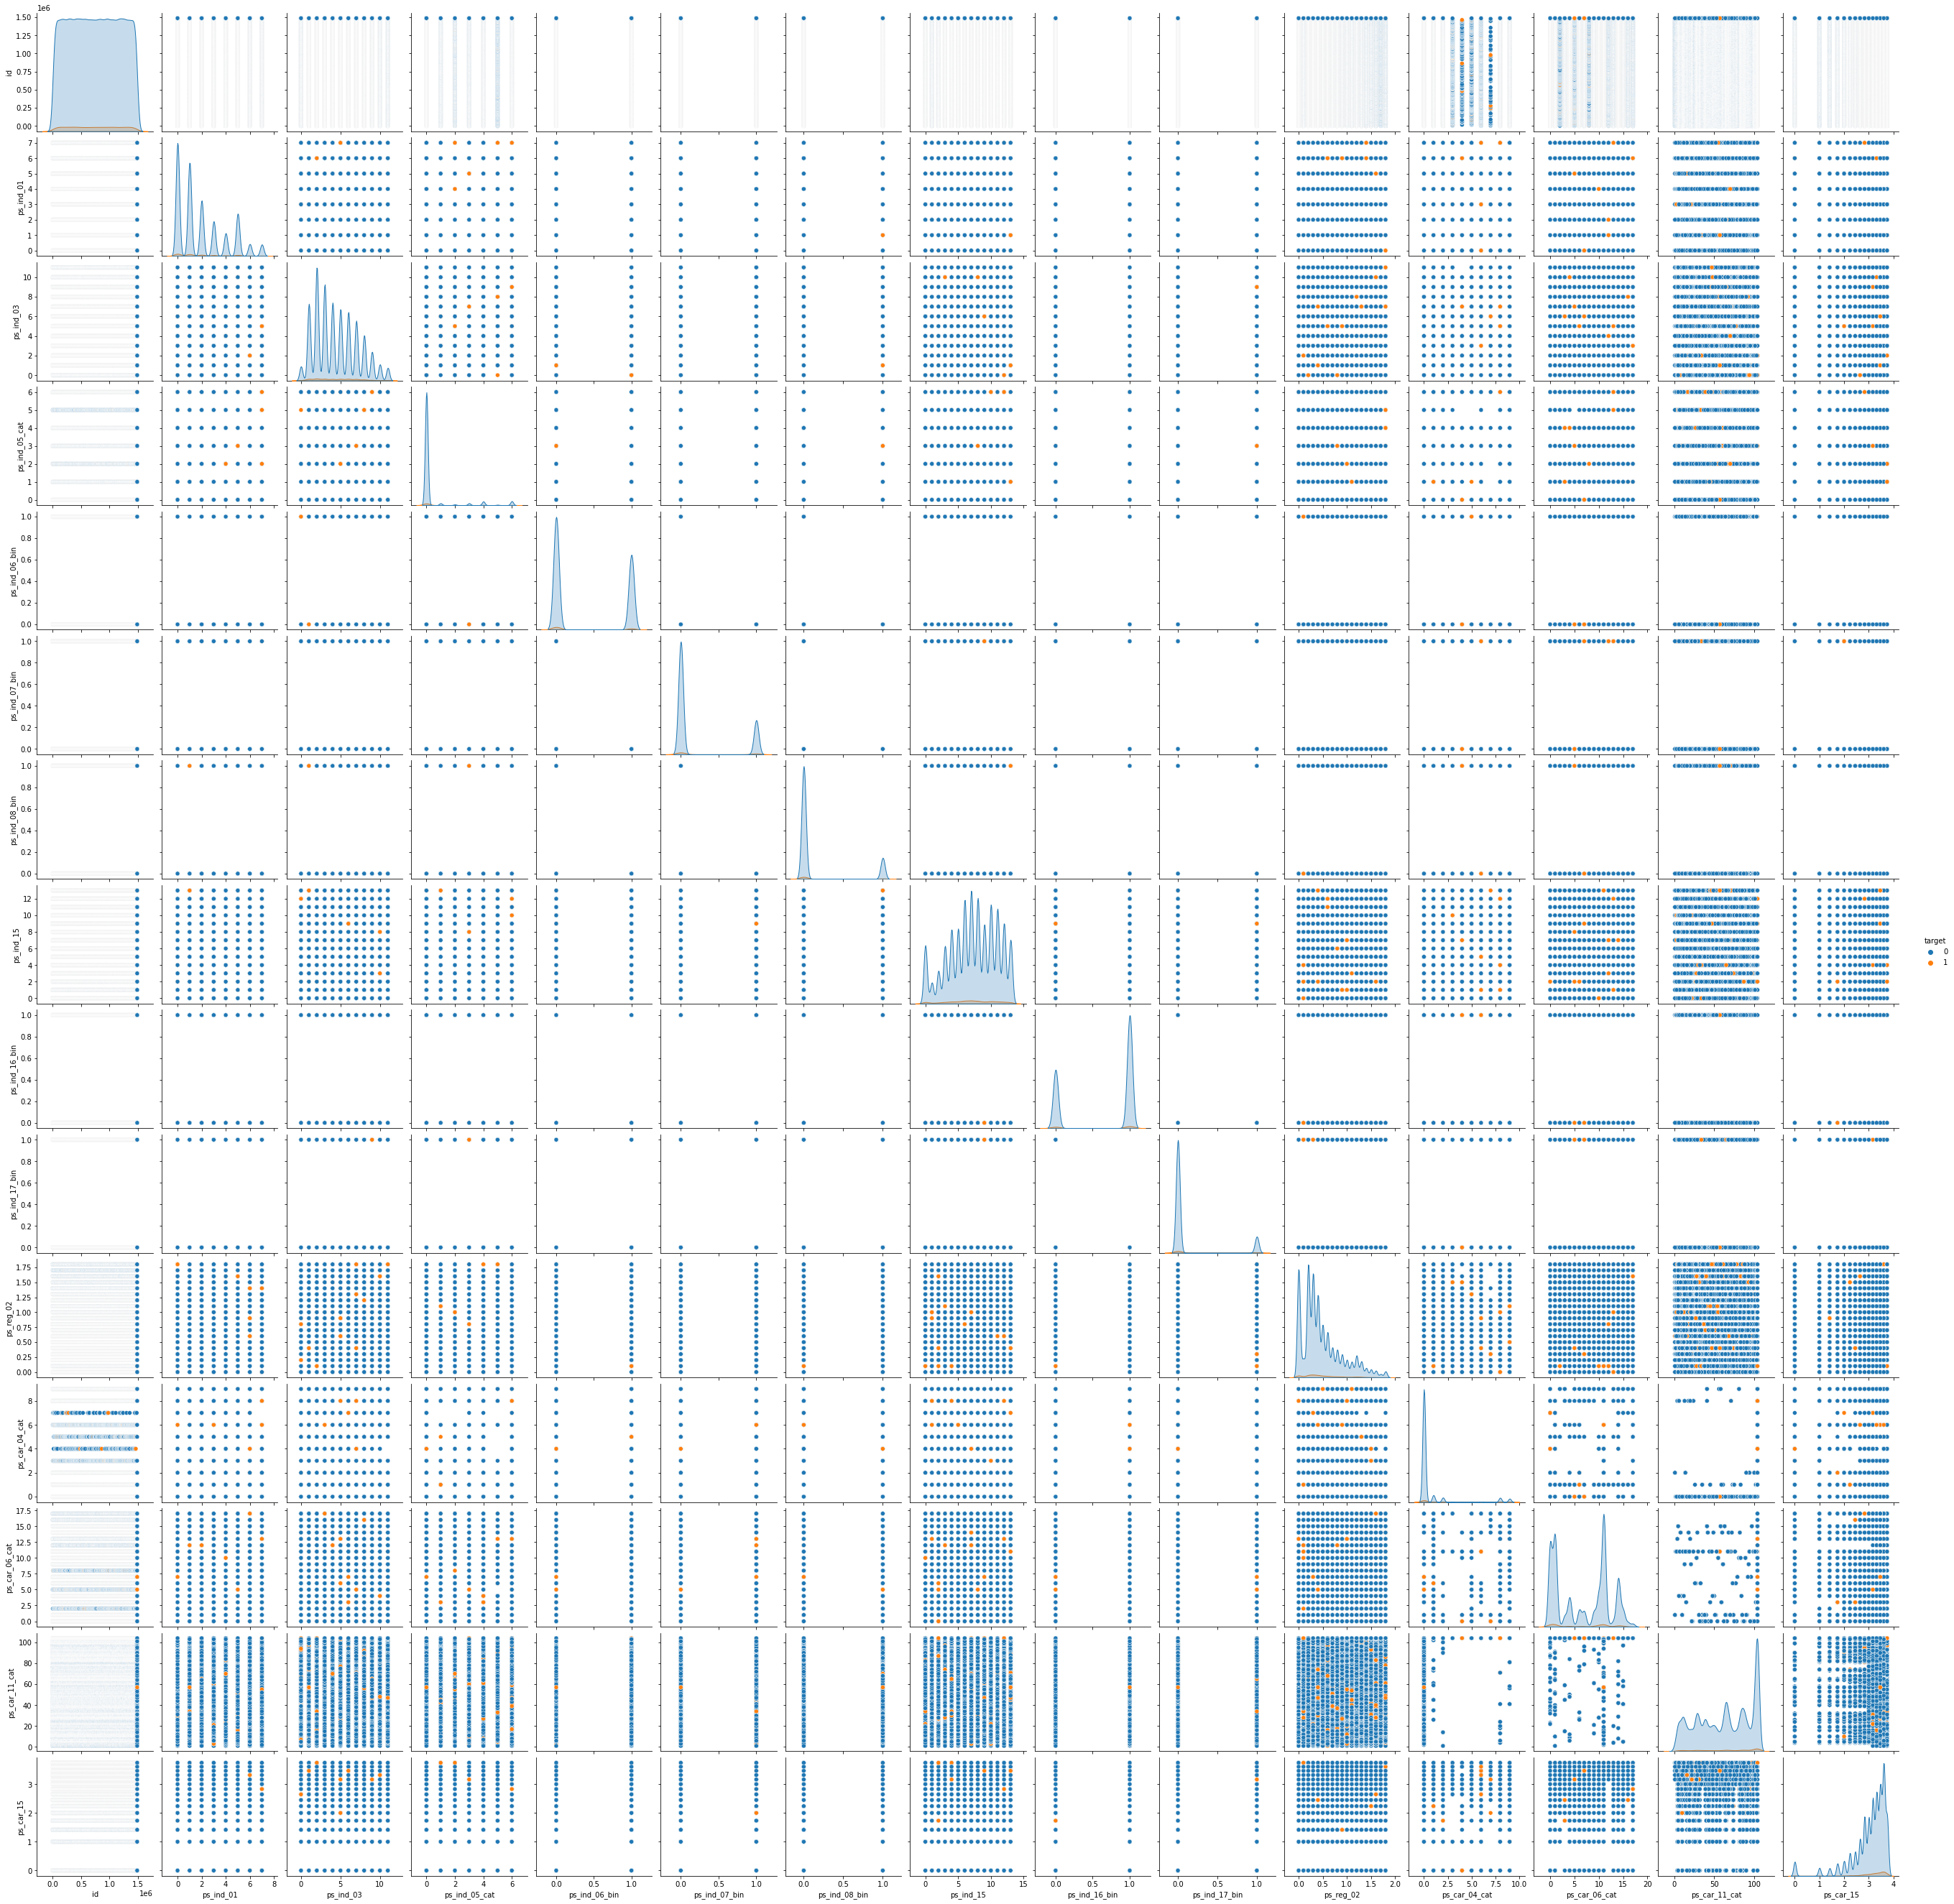

In [18]:
sns.pairplot(df3, hue="target")